# INTRODUCTION

__Problem__:

Churn is the number of customers that don't return to your company after making a purchase. When it occurs, the company’s revenue will decrease. When talking about revenue, we also talk about cost. There are promotional costs known as Acquisition Cost and Retention Cost. According to [outboundengine.com](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-), acquiring a new customer can __cost five times__ more than retaining an existing customer. Also, increasing customer retention by 5% can increase profits from 25-95%. In other words, it is better to prevent the churn than acquire new customers.

Churn occurs in many industries including Telco industry. A high rate of churn will harm the business in the long term. Therefore, it is important to identify the customers who will churn so that the telco company can take action to prevent that. Due to human limitations in analyzing and predicting large amounts of data, machine learning is needed to predict the churn problem. Predicting churn using machine learning also capable to help the company to allocate the cost as precise as possible.

The company could reach the customers for communication and ask for feedback or even give discount, bundling campaigns, or other incentives to prevent them from churning. Knowing which customers who will churn could reduce the number of customers to be given the promo and later it will reduce the churn rate.


__Goal__: Predict customers who will churn 

__Action__: Reach the customers who are predicted to Churn to them treatments such as communicate and ask for feedback as well as give incentives (discount, bundling package etc.)

__Value__: Allocate the cost as precise as possible

# 1. Import Library and Dataset

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score, plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve
import pickle
from imblearn.over_sampling import SMOTE
from pathlib import Path


In [2]:
# Import Dataset
df = pd.read_csv("dataset_telco.csv")

# Display 5 top rows
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,62759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,62557574162,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,62366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,62779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,62923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data Preparation and Data Cleansing

### 2.1. Variable Identification

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


In [4]:
# Statistical summary of numerical variables
df.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7113.000000,7113.000000,7014.000000,7087.000000,7098.000000
mean,202005.999016,0.161816,32.749358,67.018985,2306.582650
std,0.031357,0.368308,25.206376,117.396646,2575.212013
min,202005.000000,0.000000,0.000000,0.000000,19.000000
25%,202006.000000,0.000000,9.000000,36.100000,402.925000
50%,202006.000000,0.000000,30.000000,70.450000,1400.700000
75%,202006.000000,0.000000,56.000000,89.900000,3801.600000
max,202006.000000,1.000000,500.000000,9000.000000,80000.000000


In [5]:
# Statistical summary of categorical variables
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7113,7113,7113,7113,7113,7113,7113,7113,7113,7113,7113,7113,7113,7113,7113,7113,7070
unique,7017,4,2,3,2,3,3,3,3,3,3,3,3,3,2,4,3
top,6.25E+11,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,18,3581,3676,4978,6423,3428,3125,3531,3120,3120,3502,2837,2809,3905,4206,2385,5195


### 2.2. Filter the Valid Customers

__a. Filter the Valid Customers ID__

To find the valid customers, first we have to filter the valid customerID (Phone Number), with following criterias:
- The length is 11 to 12 characters
- Integer only
- Started with 62 for the first two characters

In [6]:
# Filter valid customers
df['valid.id'] = df['customerID'].astype(str).str.match(r'(62\d{9,10})')
df = (df[df['valid.id'] == True]).drop('valid.id', axis = 1)

__b. Filter the duplication of customers' ID__

The duplication is potentially caused by:
- More than one in inserting (all the column values is same)
- Different data acquisition period

In [7]:
# Drop Duplicate Rows
df.drop_duplicates()

# Drop duplicate ID sorted by Periode
df = df.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

In [8]:
# Check the data shapes
df.shape

(6993, 22)

It can be said that the valid customers is 6993 in total

### 2.3. Handle Missing Values

In [9]:
# Check null data
df.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

__a. Handle  missing values of Churn variable__

Churn column has 43 missing values. Churn column is a target column, so it will be better if we exclude rows with missing values to make a better model

In [10]:
# Drop rows of Churn column with missing values
df = df.dropna(subset = ['Churn'])
print(f'The dataset shape now: {df.shape}')

The dataset shape now: (6950, 22)


__b. Handle  missing values of other variables__

- Tenure: fill by 11 (following the dataset owner)
- Other numerical variables: median of each variable

In [11]:
# Fill missing values of Tenure with 11
df['tenure'].fillna(11, inplace=True)

# Fill missing values of other numerical variables with median
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df[col_name].median()
    df[col_name].fillna(median, inplace=True)

In [12]:
# Check whether the missing values is handled well
df.isnull().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2.4. Outliers

The Dataset before Outliers Handling: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


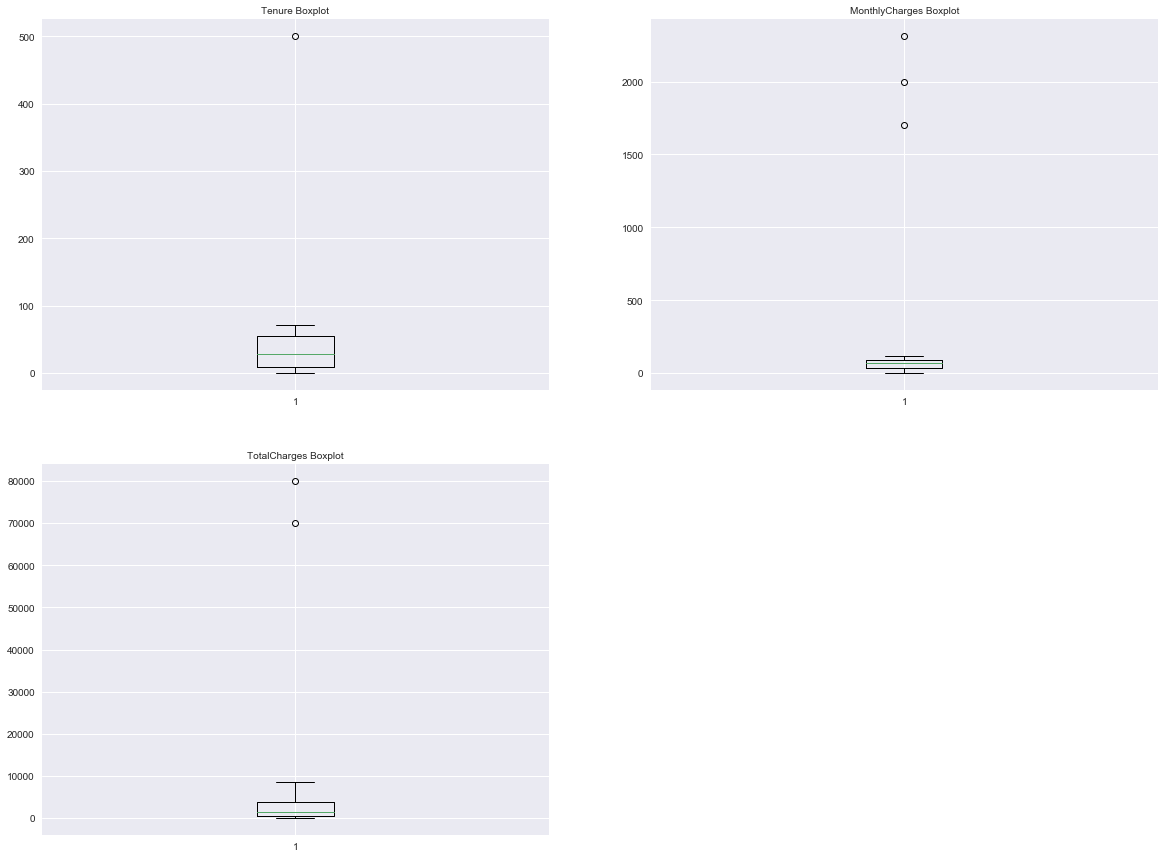

In [13]:
# Find Out Outliers
print('The Dataset before Outliers Handling: ')
print(df[['tenure','MonthlyCharges','TotalCharges']].describe())

plt.style.use('seaborn')
plt.figure(figsize = (20, 15))

plt.subplot(221)
plt.boxplot(df['tenure'])
plt.title('Tenure Boxplot', size=10)

plt.subplot(222)
plt.boxplot(df['MonthlyCharges'])
plt.title('MonthlyCharges Boxplot', size=10)

plt.subplot(223)
plt.boxplot(df['TotalCharges'])
plt.title('TotalCharges Boxplot', size=10)

plt.show()

In [14]:
# Handling the Outliers
# Handling with IQR
Q1 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)

print('The Dataset after Outliers Handling: ')
print(df[['tenure','MonthlyCharges','TotalCharges']].describe())

The Dataset after Outliers Handling: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


### 2.5. Standardization

In [15]:
# Unique values count before Standardized
list_column = ['gender','SeniorCitizen','Partner','Dependents'
               ,'PhoneService','MultipleLines','InternetService'
               ,'OnlineSecurity','OnlineBackup','DeviceProtection'
               ,'TechSupport','StreamingTV','StreamingMovies'
               ,'Contract','PaperlessBilling','PaymentMethod','Churn']

for i in list_column:
    print('\nUnique Values Count Variable',i)
    print(df[i].value_counts())


Unique Values Count Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Variable OnlineSecurity
No                     3454
Yes                    1991
No internet service    1505
Name: OnlineSecurity, dtype: int64

Unique V

In [16]:
# Categoric Variable Standardization
df = df.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])


for i in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count After Standardized Variable',i)
    print(df[i].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


# 3. Data Exploration

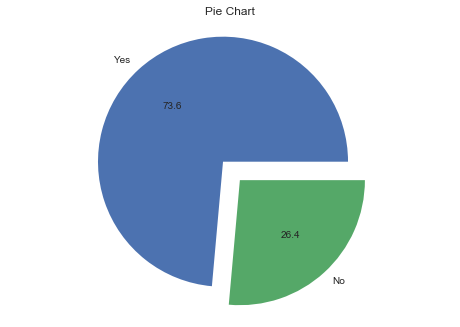

In [17]:
# Target Variable Exploration
plt.figure()
plt.pie(df.Churn.value_counts(), 
        labels = ['Yes','No'],
        autopct = '%.1f',
        explode = (0, 0.2))
plt.axis('equal')
plt.title('Pie Chart')
plt.show()

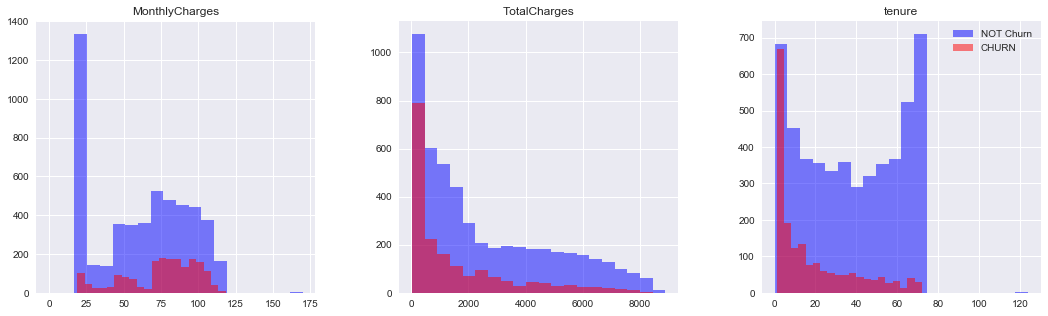

In [18]:
# Numerical Data Exploration

# creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='red', alpha=0.5, ax=ax)
plt.legend(['NOT Churn','CHURN'])
plt.show()


__SUMMARY:__

- For **MonthlyCharges** feature, there is a tendency that **the smaller the value of the monthly fees charged, the smaller the tendency to do Churn**. 
- For TotalCharges there doesn't seem to be any inclination towards Churn customers. 
- For **tenure, there is a tendency that the longer the customer subscribes, the less likely it is to churn**.

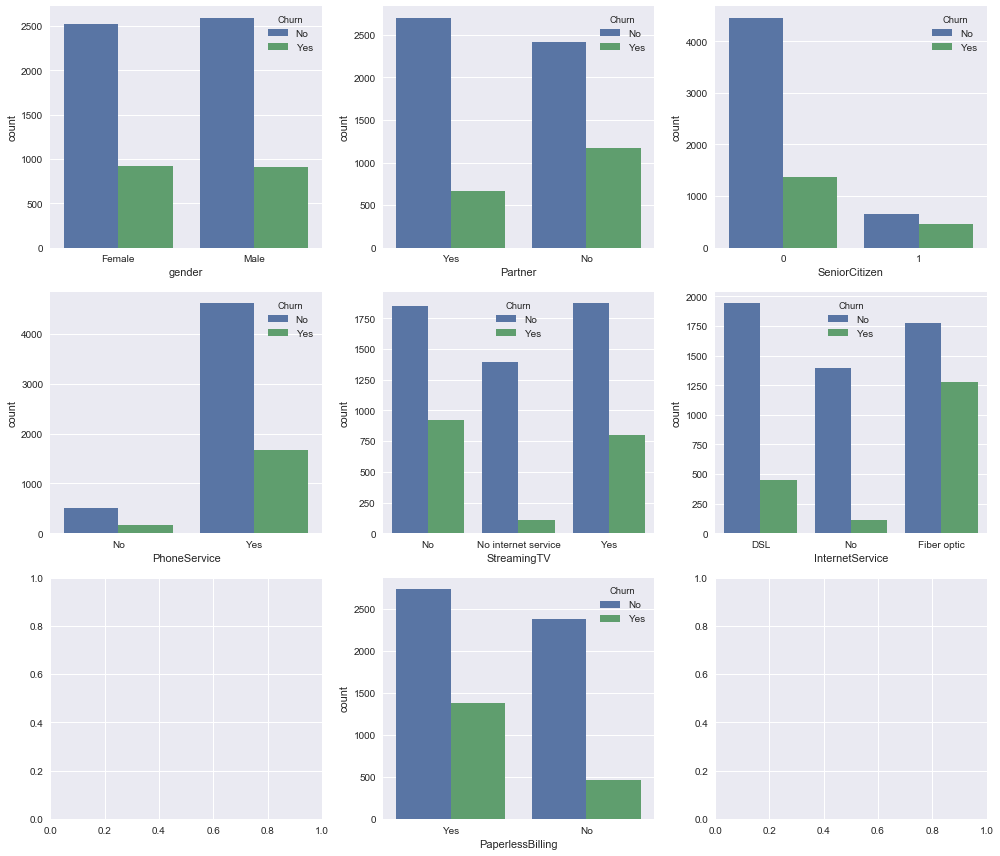

In [19]:
# Categorical Data Exploration
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data = df, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data = df, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data = df, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data = df, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data = df, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data = df, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data = df, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

__SUMMARY:__ 
- There is no significant difference for people doing churn in terms of gender and telephone service (Phone Service). 
- However, there is a tendency that **PEOPLE WHO CHURN** are people who:
    - **do not have a partner** (partner: No), 
    - **people whose status is a senior citizen** (Senior Citizen: Yes), 
    - **people who have streaming TV services** (StreamingTV: Yes) , 
    - **people who have Internet service** (internetService: Yes) and 
    - **people who have paperless bills** (PaperlessBilling: Yes).

# 4. Data Preprocessing

### 4.1. Delete Unecessary Column

In [20]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df.drop(['customerID','UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4727,Male,0,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
4738,Male,0,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
4737,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4736,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No


### 4.2. Data Encoding

In [21]:
# Data Encoding
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
    
cleaned_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
4727,1,0,1,0,60.0,1,0,2,1,1,1,1,1,1,2,1,0,20.50,1198.80,0
4738,1,0,0,0,5.0,1,2,1,0,2,2,0,2,2,0,0,3,104.10,541.90,1
4737,0,0,1,0,72.0,1,2,1,2,2,2,2,2,2,2,1,0,115.50,8312.75,0
4736,0,0,1,1,56.0,1,2,0,2,2,2,2,2,0,2,0,1,81.25,4620.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,1,0,0,0,1.0,1,0,0,0,0,0,0,0,0,0,1,2,44.75,44.75,0
2366,0,1,0,0,1.0,1,0,1,0,0,0,0,0,0,0,1,2,70.15,70.15,1
2367,0,0,0,0,1.0,1,0,1,0,0,2,0,2,0,0,1,1,85.55,85.55,1
2368,0,0,1,0,72.0,1,2,1,2,2,2,2,2,2,2,1,1,117.15,8529.50,0


In [22]:
cleaned_df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,0.299281,32.423165,0.903741,0.940863,0.872950,0.789496,0.907194,0.904604,0.796115,0.985180,0.992950,0.690216,0.591942,1.576403,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,0.457976,24.581073,0.294967,0.948880,0.737618,0.859795,0.880313,0.880037,0.861389,0.885069,0.885165,0.833363,0.491509,1.067780,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,1.000000,124.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,169.931250,8889.131250,1.000000


### 4.3. Oversampling and Split Data to Training-Test

In [23]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']

# Oversampling using SMOTE
oversample = SMOTE(random_state=10)
X, y = oversample.fit_resample(X, y)

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=50)

# Print according to the expected result
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Churn Percentage of Training Data:')
print(y_train.value_counts(normalize=True))
print()      
print('Shape of x_train:', x_test.shape)
print('Shape of y_train:', y_test.shape)
print('Churn Percentage of Test Data:')
print(y_test.value_counts(normalize=True))

Shape of x_train: (8182, 19)
Shape of y_train: (8182,)
Churn Percentage of Training Data:
1    0.5
0    0.5
Name: Churn, dtype: float64

Shape of x_train: (2046, 19)
Shape of y_train: (2046,)
Churn Percentage of Test Data:
1    0.5
0    0.5
Name: Churn, dtype: float64


# 5. Modeling

### 4.1. Building Model

In [24]:
# Modeling using Logistic regression
log_model = LogisticRegression().fit(x_train, y_train)

C:\Users\Junio\anaconda3-\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 4.2. Training Data Performance

In [25]:
# Display Metrics

# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      4091
           1       0.78      0.83      0.80      4091

    accuracy                           0.80      8182
   macro avg       0.80      0.80      0.80      8182
weighted avg       0.80      0.80      0.80      8182



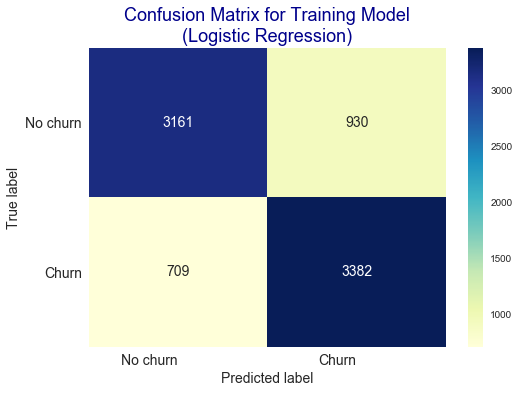

In [26]:
# Display Plots

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### 4.3. Testing Data Performance

In [27]:
# Display Metrics

# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1023
           1       0.77      0.83      0.80      1023

    accuracy                           0.79      2046
   macro avg       0.79      0.79      0.79      2046
weighted avg       0.79      0.79      0.79      2046



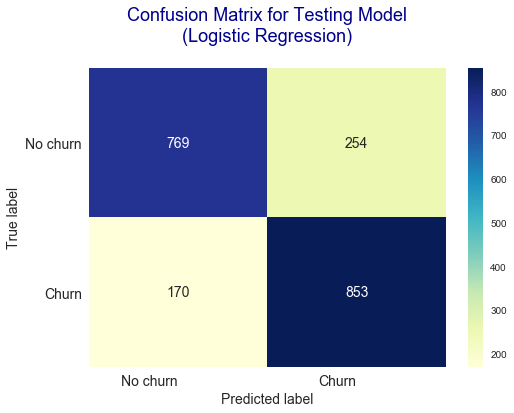

In [28]:
# Display Plots

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


- From the training data, it can be seen that the model is able to predict the data by 80% accuracy. The guess of churn that was actually churn was 3382, the guess of churn that was actually not churn was 930, the guess of not churn that was actually not churn was 769 and the guess of not churn that was actually churn was 3161.

- From the training data, it can be seen that the model is able to predict the data by 79% accuracy. The guess of churn that was actually churn was 853, the guess of churn that was actually not churn was 254, the guess of not churn that was actually not churn was 769 and the guess of not churn that was actually churn was 170.

- It can be said the model is APPROPRIATE FIT to the data, since the training and testing accuracy is similar

================================================================================================

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" alt="Hotel Lobby" style="width:690px;height:345px;">

The steps 4.1-4.3 shows the model accuracy in general. But, since the Retention Cost is lower than Acquistion Cost, it is better if our model has a lower number of customer who actually Churn but predicted as No Churn (False Negative). If that number is high, then the company needs to spend more than it should be. Therefore, we will use __Recall__ metrics.

In [29]:
print(f'RECALL SCORE: {recall_score(y_test, y_test_pred)}')

RECALL SCORE: 0.833822091886608


### 4.4 Hyperparameter Tuning

In [30]:
log_params = {
    'C': np.linspace(0,1,10),
    'solver': ['lbfgs', 'liblinear', 'newton-cg']
}

In [31]:
# Grid Search Tuning
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

log_grid = GridSearchCV(log_model, param_grid=log_params, scoring='recall', cv=skf, verbose=1, n_jobs=-1)
log_grid.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\Junio\anaconda3-\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.82253747 0.84429428 0.84576098
 0.82522666 0.84380678 0.84600548 0.83011664 0.84551797 0.84698377
 0.82424867 0.84527317 0.84722827 0.82669365 0.84453968 0.84698377
 0.82034057 0.84527258 0.84673957 0.82766866 0.84502778 0.84673957
 0.82620466 0.84527228 0.84673957 0.82986766 0.84600548 0.84673957]
  category=UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='recall', verbose=1)

In [32]:
# Cross validation score
rskf = RepeatedStratifiedKFold(n_splits=5, random_state=2021)

log_tuned = log_grid.best_estimator_
log_tuned_score = cross_val_score(log_tuned, x_train, y_train, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.9s finished


In [33]:
print(log_tuned_score)
print(log_tuned_score.mean())

[0.82661783 0.86674817 0.8606357  0.83740831 0.83496333 0.85714286
 0.85819071 0.83496333 0.8594132  0.8202934  0.83882784 0.85330073
 0.85207824 0.82762836 0.86185819 0.84493284 0.8594132  0.84718826
 0.82396088 0.85207824 0.86691087 0.83129584 0.83374083 0.86797066
 0.83618582 0.86080586 0.8594132  0.84229829 0.83129584 0.83496333
 0.83638584 0.84229829 0.84229829 0.84841076 0.85330073 0.86446886
 0.83129584 0.85696822 0.85207824 0.82518337 0.86324786 0.85330073
 0.83251834 0.8594132  0.83129584 0.82539683 0.84474328 0.83496333
 0.84596577 0.87530562]
0.846027268032158


In [34]:
# Recall score on test data after tuning
log_tuned.fit(x_train, y_train)
recall_score(y_train, log_tuned.predict(x_train))

0.8464923001711073

In [35]:
# Recall score on test data after tuning
log_tuned.fit(x_train, y_train)
recall_score(y_test, log_tuned.predict(x_test))

0.8572825024437928

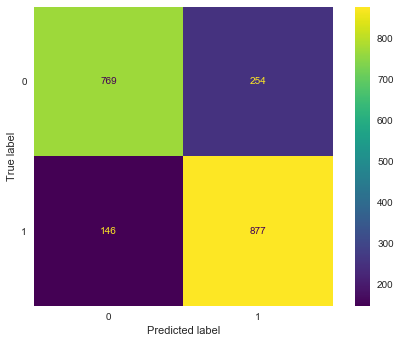

In [36]:
# Confusion matrix AFTER tuning
plot_confusion_matrix(log_tuned, x_test, y_test)
plt.grid(None)
plt.show()

In [37]:
# Comparison BEFORE x AFTER tuning
print(f'Recall score BEFORE tuning: {recall_score(y_test, y_test_pred)}')
print(f'Recall score AFTER tuning: {recall_score(y_test, log_tuned.predict(x_test))}')

Recall score BEFORE tuning: 0.833822091886608
Recall score AFTER tuning: 0.8572825024437928


The tuning managed to increase model score. So the tuned model will be used.

### 4.5 Threshold Adjustment

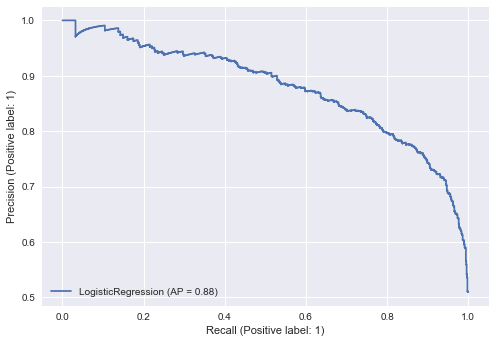

In [38]:
plot_precision_recall_curve(log_tuned, x_test, y_test)
plt.show()

In [39]:
p, r, t = precision_recall_curve(y_test, log_tuned.predict_proba(x_test)[:,1])
len(p[:-1]), len(r[:-1]), len(t)
pr_df = pd.DataFrame({'precision': p[:-1], 'recall': r[:-1], 'threshold': t})
pr_df

,precision,recall,threshold
0,0.509462,1.000000,0.001927
1,0.509218,0.999022,0.001933
2,0.509472,0.999022,0.001977
3,0.509726,0.999022,0.002045
4,0.509980,0.999022,0.002052
...,...,...,...
2002,1.000000,0.004888,0.940996
2003,1.000000,0.003910,0.941592
2004,1.000000,0.002933,0.942713
2005,1.000000,0.001955,0.946219


In [40]:
pr_df[(pr_df['recall'].between(0.88, 0.92)) & (pr_df['precision'].between(0.72, 1))].sort_values('recall', ascending=False).head(10)

,precision,recall,threshold
713,0.726641,0.919844,0.367751
714,0.727202,0.919844,0.370970
715,0.726991,0.918866,0.371058
716,0.727554,0.918866,0.373067
717,0.727343,0.917889,0.374451
718,0.727907,0.917889,0.375253
719,0.728472,0.917889,0.375747
720,0.728261,0.916911,0.375815
721,0.728827,0.916911,0.375873
722,0.728616,0.915934,0.376755


Here, I choose 0.367751 as a new threshold

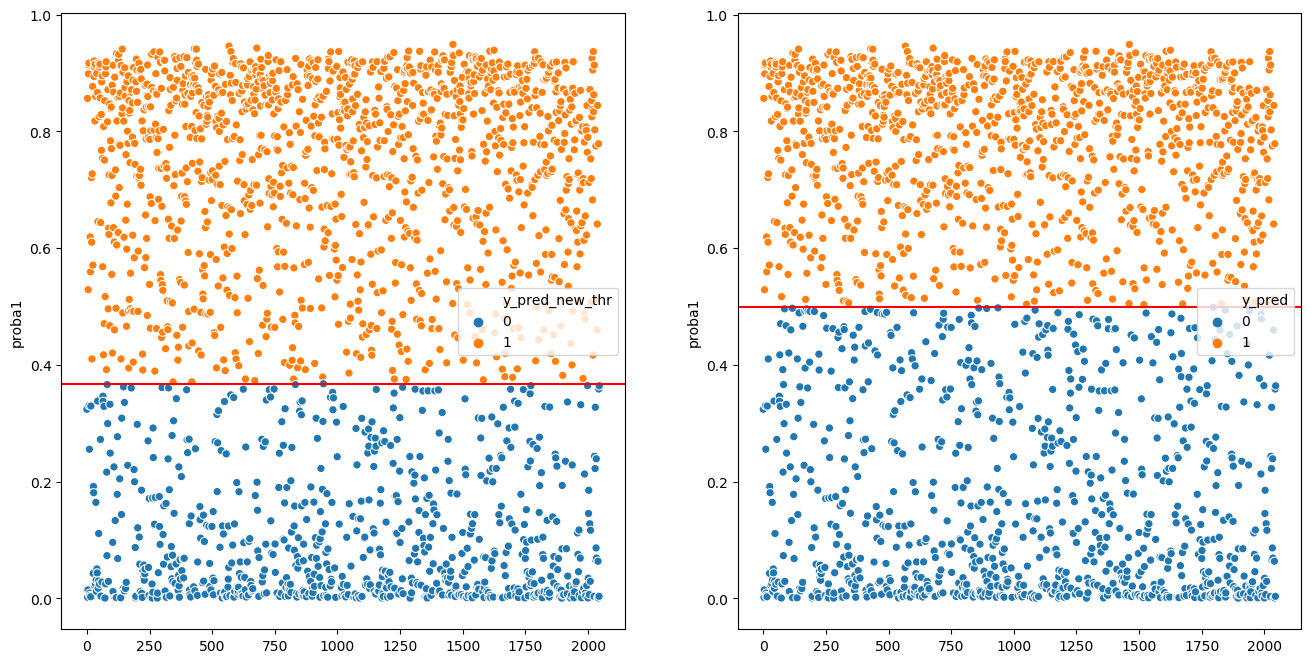

In [41]:
proba1 = log_tuned.predict_proba(x_test)[:,1]
y_pred = log_tuned.predict(x_test)
thresh = 0.367751
pred_new_thr = np.where(proba1 > thresh, 1, 0)
res_df = pd.DataFrame({'proba1': proba1, 'y_pred': y_pred, 'y_pred_new_thr': pred_new_thr})

plt.style.use('default')
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.scatterplot(x=range(len(res_df)), y=res_df['proba1'], hue=res_df['y_pred_new_thr'])
plt.axhline(thresh, color='red')

plt.subplot(122)
sns.scatterplot(x=range(len(res_df)), y=res_df['proba1'], hue=res_df['y_pred'])
plt.axhline(0.5, color='red')

plt.show()

In [42]:
# Comparison BEFORE x AFTER tuning
print(f'PRECISION score BEFORE threshold adjustment: {round(precision_score(y_test, log_tuned.predict(x_test))*100,3)}')
print(f'RECALL score BEFORE threshold adjustment: {round(recall_score(y_test, log_tuned.predict(x_test))*100,3)}')
print(f'PRECISION score AFTER threshold adjustment: {round(precision_score(y_test, pred_new_thr)*100,3)}')
print(f'RECALL score AFTER threshold adjustment: {round(recall_score(y_test, pred_new_thr)*100,3)}')
print('')
print(f'PRECISION score difference: {round(precision_score(y_test, pred_new_thr) - precision_score(y_test, log_tuned.predict(x_test)),3)*100}')
print(f'RECALL score difference: {round(recall_score(y_test, pred_new_thr) - recall_score(y_test, log_tuned.predict(x_test)),3)*100}')

PRECISION score BEFORE threshold adjustment: 77.542
RECALL score BEFORE threshold adjustment: 85.728
PRECISION score AFTER threshold adjustment: 72.72
RECALL score AFTER threshold adjustment: 91.984

PRECISION score difference: -4.8
RECALL score difference: 6.3


### 4.6 Final Results

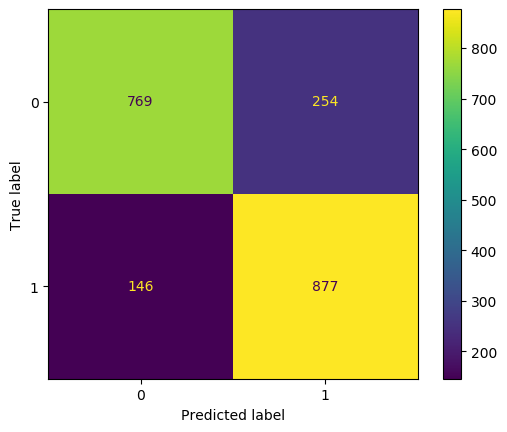

In [43]:
# Confusion matrix tuned model BEFORE threshold adjustment --> Model A
plot_confusion_matrix(log_tuned, x_test, y_test)
plt.show()

In [44]:
print("Customers who don't get treatments and leave:", round(146/(146+769)*100,2),"%")
print("Customers who get treatments but actually do not churn:", round(254/(254+877)*100,2),"%")

Customers who don't get treatments and leave: 15.96 %
Customers who get treatments but actually do not churn: 22.46 %


In [45]:
# Confusion matrix tuned model AFTER threshold adjustment --> Model B
def make_conf_matrix(confusion):
    tn, fp, fn, tp = confusion.flatten()
    conf_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]},
                           index=['a_0', 'a_1', 'total_prediction'])
    return conf_df

In [46]:
make_conf_matrix(confusion_matrix(y_test, pred_new_thr))

,p_0,p_1,total_actual
a_0,670,353,1023
a_1,82,941,1023
total_prediction,752,1294,2046


In [47]:
print("Customers who don't get treatments and leave:", round(82/(82+670)*100,2),"%")
print("Customers who get treatments but actually do not churn:", round(353/(353+941)*100,2),"%")

Customers who don't get treatments and leave: 10.9 %
Customers who get treatments but actually do not churn: 27.28 %


In [48]:
# Cost Comparison
print(f'Model A Cost: {22*10 +  16*50} USD')
print(f'Model B Cost: {27*10 +  11*50} USD')

Model A Cost: 1020 USD
Model B Cost: 820 USD


__Summary:__

By adjusting threshold, the percentage customers who don't get a treatment and run away is decreasing from 15.96% to 10.98%. Meaning, Model A predict around 16 out of 100 customers are predicted as Not Churn but actually they leave the company's products. Meanwhile, using Model B (threshold adjustment), the customers who do not get a treatment and they leave, is only 11 out of 100 people. There was a decrease of up to 31.25%.

However, this adjustment causes the increasing of customer who get a treatment but actually do not churn from 22.46% to 27.28%. Model A predict around 22 out of 100 customers are predicted as Churn but actually they stay. Meanwhile, using Model B, the customers who get a treatment but actually they stay, is 27 out of 100 people. There was a increase of up to 22.7%.

As stated in problem section, Acquisition Cost is 5x higher than Retention Cost. Let's say the Acquisition Cost is 50 USD, meaning the Retention Cost is 10 USD. That means:
- The total cost of using Model A is 1000 USD
- The total cost of using Model B is 820 USD
- Using __optimized model will reduce cost up to 19.6%__

By knowing which customers are most likely going to churn, the company doesn't need to give treatment to all of the customers. They only need to give treatments to the customers who are predicted to churn. By using the optimized model, the company will give treatments to 1294 customers or 63% of all the customers. In other words, the model helps the company to __reduce the customers to be treated up to 37%__.